In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold \
        , cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

plt.rcParams["figure.figsize"] = (16, 9)

In [90]:
df = pd.read_csv('train.csv')

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
titanic_df = df.copy()

titanic_df.set_index('PassengerId', inplace=True)

titanic_df['Is_female'] = titanic_df.Sex.apply(lambda x: 1 if x == 'female' else 0)

# titanic_df.Age.fillna(
#     np.mean(titanic_df.Age), inplace=True
# )
# titanic_df.Embarked.fillna(
#     titanic_df.Embarked.value_counts().index[0], inplace=True
# )

# titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])


titanic_df.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked_C'], axis=1, inplace=True)

KeyError: "['Embarked_C'] not found in axis"

In [99]:
titanic_df.Age.fillna(titanic_df.groupby('Is_female').Age.transform('mean')
                     , inplace=True)

In [100]:
titanic_df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Is_female      0
dtype: int64

In [108]:
titanic_df.dropna(inplace=True)

In [109]:
titanic_df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Is_female      0
dtype: int64

In [105]:
fig = plt.figure(figsize=(16, 9))

# ax1 = fig.add_subplot(1, 2, 1)

sns.heatmap(titanic_df)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1152x648 with 0 Axes>

In [81]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,1
4,1,1,35.0,1,0,53.1000,1,0,1
5,0,3,35.0,0,0,8.0500,0,0,1


In [82]:
titanic_df.isna().any().any()

False

Text(0.5, 0, 'Пол')

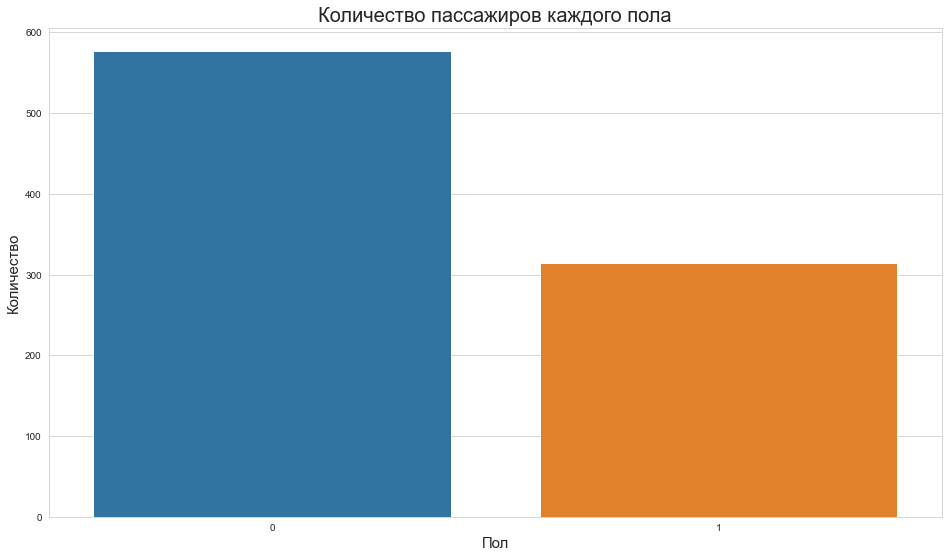

In [83]:
# fig = plt.figure(figsize=(16, 9))
sns.set_style('whitegrid')

sns.barplot(x=titanic_df['Is_female'].unique()
            , y=titanic_df.reset_index().groupby('Is_female').PassengerId.count())
plt.title('Количество пассажиров каждого пола', fontsize=20)
plt.ylabel('Количество', fontsize=15)
plt.xlabel('Пол', fontsize=15)

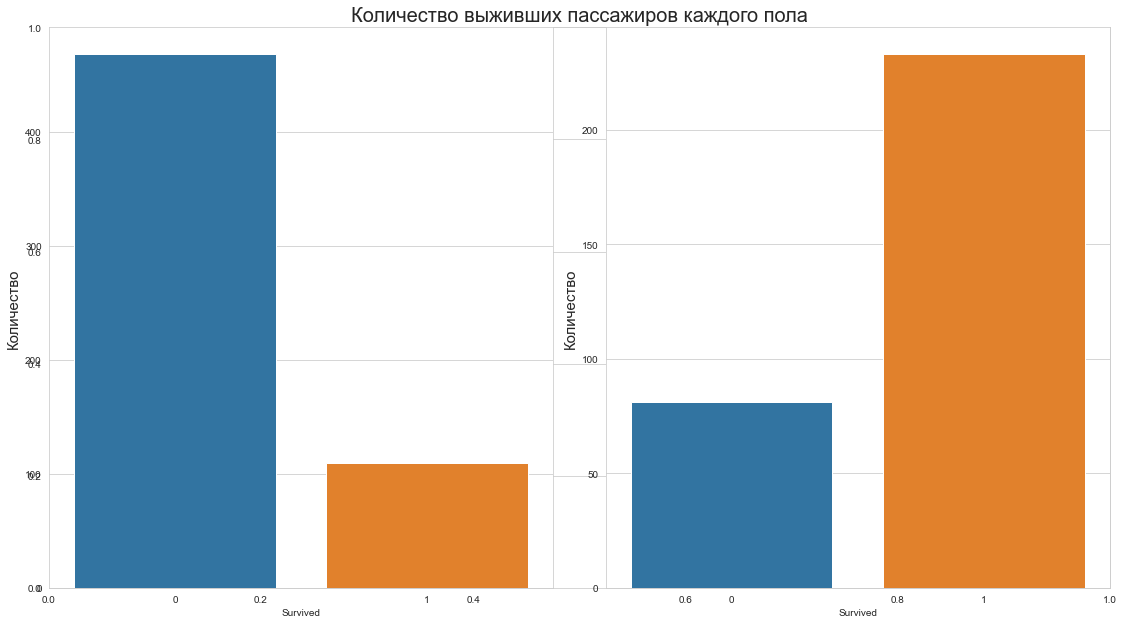

In [84]:
fig = plt.figure()
plt.title('Количество выживших пассажиров каждого пола', fontsize=20)
for sex in titanic_df.Is_female.unique():
    sex_df = titanic_df[titanic_df.Is_female == sex] \
        .reset_index().groupby('Survived').PassengerId.count()
    
    ax = fig.add_subplot(1, 2, sex + 1)
    sns.barplot(x=sex_df.index, y=sex_df)
    
    plt.ylabel('Количество', fontsize=15)
plt.tight_layout()

Уже видно, что распределение показателя выжил/не выжил сильно различается для пассажиров разного пола. Эта фича нам подходит

Text(0.5, 1.0, 'Age')

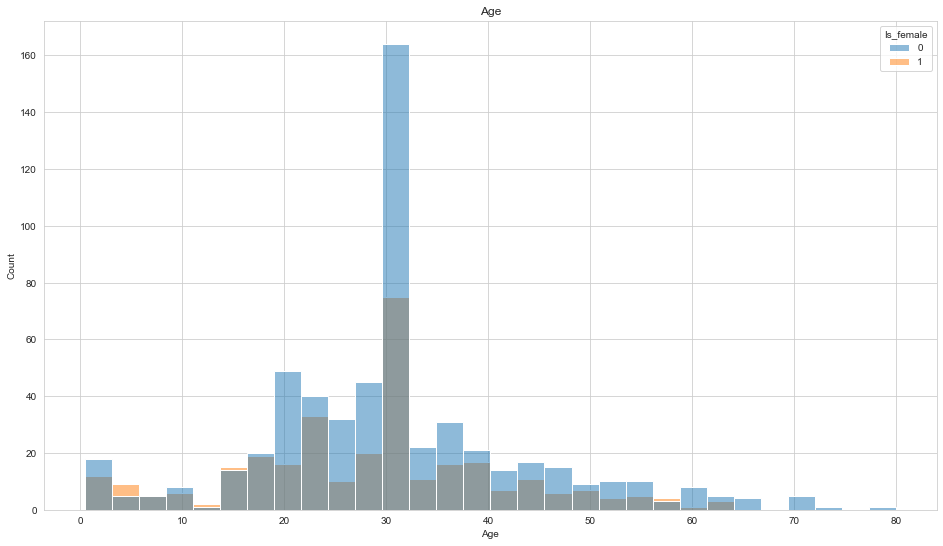

In [85]:
fig = plt.figure()

sns.histplot(x=titanic_df.Age, hue=titanic_df.Is_female)
plt.title('Age')

Text(0.5, 1.0, 'Dead')

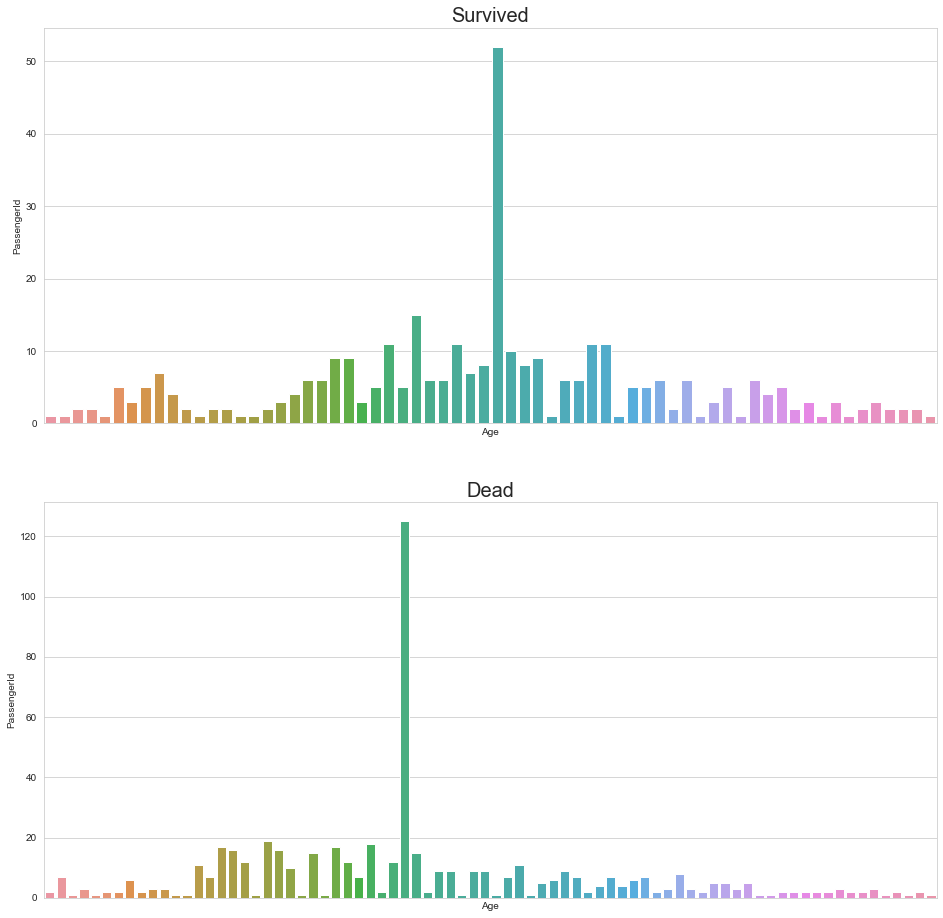

In [86]:
fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(2, 1, 1)
grouped_age_df = titanic_df[titanic_df.Survived == 1].reset_index() \
                .groupby('Age').PassengerId.count() 

sns.barplot(x=grouped_age_df.index, y=grouped_age_df)
plt.xticks([])
plt.title('Survived', fontsize=20)

ax2 = fig.add_subplot(2, 1, 2)
grouped_age_df = titanic_df[titanic_df.Survived == 0].reset_index() \
                .groupby('Age').PassengerId.count() 

sns.barplot(x=grouped_age_df.index, y=grouped_age_df)
plt.xticks([])
plt.title('Dead', fontsize=20)

In [87]:
fig = plt.figure()

<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Sex')

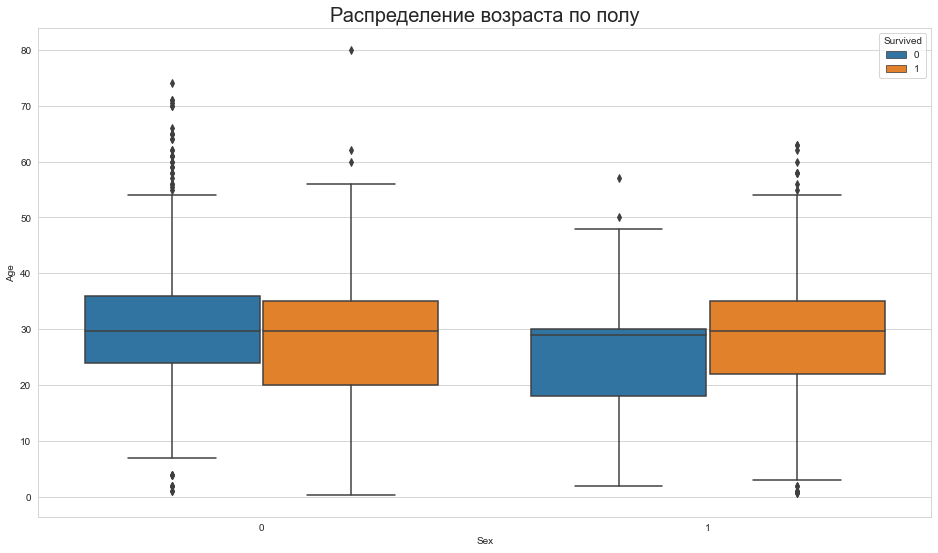

In [88]:
fig = plt.figure()

sns.boxplot(x=titanic_df.Is_female, y=titanic_df.Age, hue=titanic_df.Survived)

plt.title('Распределение возраста по полу', fontsize=20)
plt.xlabel('Sex')

<AxesSubplot:>

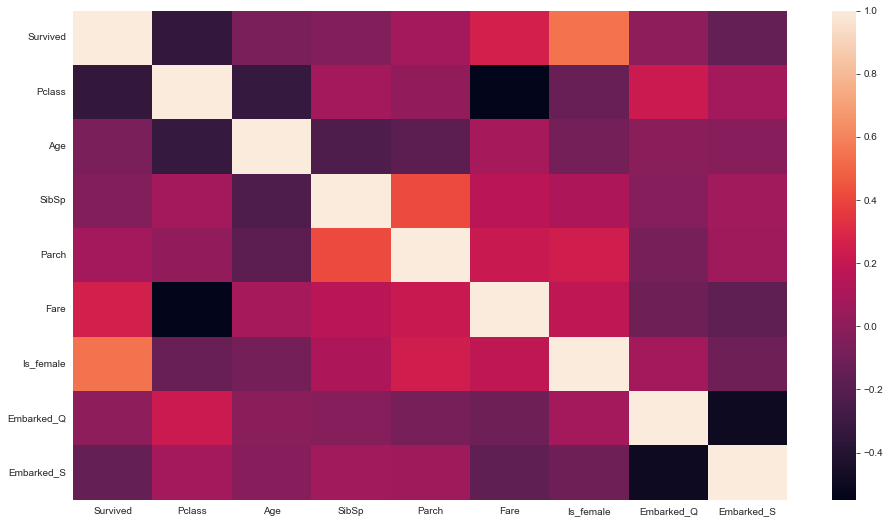

In [46]:
fig = plt.figure()

sns.heatmap(titanic_df.corr())

Можем видеть действительно сильную корреляцию между **полом** пассажира и его **"статусом"**

In [55]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [118]:
parameters = {'max_depth': range(1, 10, 2),
              'n_estimators': range(10, 50, 10),
              'min_samples_leaf': range(1, 7),
              'min_samples_split': range(2, 9, 2)}
model = RandomForestClassifier()
search = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

<AxesSubplot:xlabel='Age', ylabel='Count'>

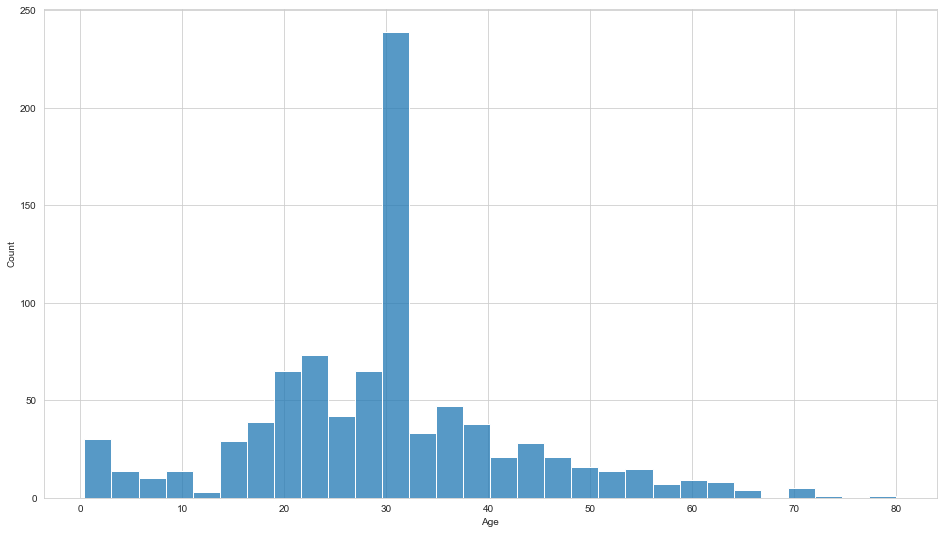

In [47]:
fig = plt.figure()

sns.histplot(titanic_df.Age)

In [76]:
search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 40}

In [111]:
best_model = search.best_estimator_
best_model.fit(X_train, y_train)
# best_model.fit(X, y)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=40)

In [78]:
roc_auc_score(y_test, best_model.predict(X_test))

0.81

In [79]:
best_model.score(X_test, y_test)

0.8305084745762712

In [81]:
cross_val_score(best_model, X, y, cv=10).mean()

0.8283395755305868

In [85]:
roc_auc_score(y_test, best_model.predict(X_test))

0.81

In [101]:
test_df = pd.read_csv('test.csv')

test_df.set_index('PassengerId', inplace=True)


test_df['Is_female'] = test_df.Sex.apply(lambda x: 1 if x == 'female' else 0)

test_df.Age.fillna(
    np.mean(test_df.Age), inplace=True
)
test_df.Embarked.fillna(
    test_df.Embarked.value_counts().index[0], inplace=True
)
test_df.Fare.fillna(
    np.mean(test_df.Fare), inplace=True
)

test_df = pd.get_dummies(test_df, columns=['Embarked'])


test_df.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked_C'], axis=1, inplace=True)

In [102]:
test_df.isna().any().any()

False

In [103]:
test_df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_female', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [104]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_female', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [112]:
X_test = test_df
y_pred = best_model.predict(X_test)

In [113]:
result = pd.concat((test_df.reset_index()[['PassengerId']], pd.DataFrame(y_pred)), axis=1)

In [114]:
result.columns = ['PassengerId', 'Survived']

In [115]:
result.to_csv('result1.csv', index=False)